In [8]:
from __future__ import print_function
import numpy as np

import numpy as np

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.W = None
        self.loss_hist = None

    def softmax_stable(self, Z):
        e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        A = e_Z / e_Z.sum(axis=1, keepdims=True)
        return A

    def softmax_loss(self, X, y):
        y_pred = self.softmax_stable(X.dot(self.W) + self.b)
        epsilon = 1e-9
        loss = -np.sum(y * np.log(y_pred + epsilon)) / y.shape[0]
        return loss

    def fit(self, X, y):
        self.W = np.random.randn(X.shape[1], y.shape[1]) * 0.01
        self.b = np.zeros((1, y.shape[1]))
        
        N = X.shape[0]
        nbatches = int(np.ceil(float(N) / self.batch_size))
        loss_hist = []
        for ep in range(self.epochs):
            mix_ids = np.random.permutation(N)
            for i in range(nbatches):
                batch_ids = mix_ids[self.batch_size * i:min(self.batch_size * (i + 1), N)]
                X_batch, y_batch = X[batch_ids], y[batch_ids]
                
                y_pred = self.softmax_stable(X_batch.dot(self.W) + self.b)
                dz = y_pred - y_batch
                dw = np.dot(X_batch.T, dz) / X_batch.shape[0]
                db = np.sum(dz, axis=0, keepdims=True) / X_batch.shape[0]
                self.W -= self.lr * dw
                self.b -= self.lr * db

            loss_hist.append(self.softmax_loss(X, y))
            if ep % 100 == 0: 
                print(f"Epoch: {ep}, Loss: {loss_hist[-1]:.4f}")
        return self.W, loss_hist

    def predict(self, X):
        A = self.softmax_stable(X.dot(self.W) + self.b)
        return np.argmax(A, axis=1)


In [3]:
from tensorflow.keras.datasets import mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


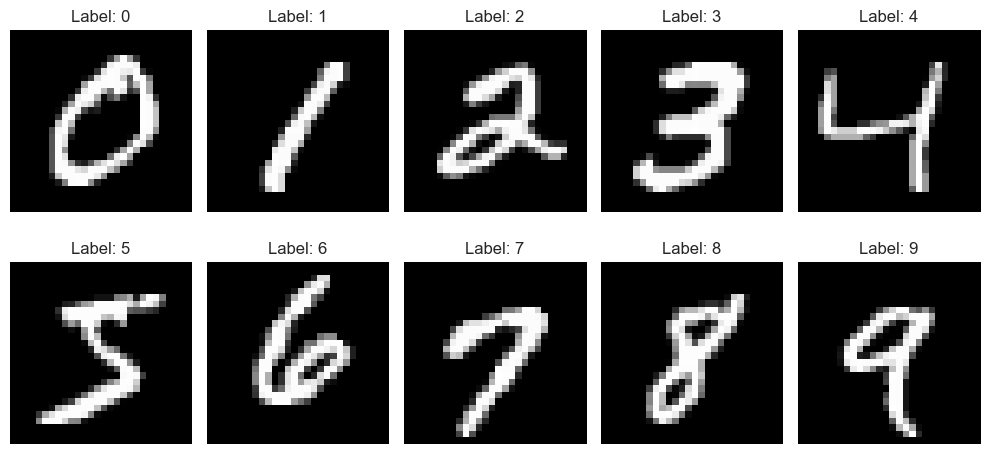

In [5]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = np.unique(y_train)
plt.figure(figsize=(10, 5))
for label in unique_labels: 
    index = np.where(y_train == label)[0][0]
    plt.subplot(2, 5, label + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0 
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

def one_hot_encoding(y, num_classes): 
    return np.eye(num_classes)[y]

num_classes = 10 
y_train_onehot = one_hot_encoding(y_train, num_classes)
y_test_onehot = one_hot_encoding(y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [10]:
model = SoftmaxRegression(learning_rate=0.01, epochs=1000, batch_size=500)
model.fit(X_train, y_train_onehot)


Epoch: 0, Loss: 1.4586
Epoch: 100, Loss: 0.3369
Epoch: 200, Loss: 0.3071
Epoch: 300, Loss: 0.2935
Epoch: 400, Loss: 0.2852
Epoch: 500, Loss: 0.2795
Epoch: 600, Loss: 0.2751
Epoch: 700, Loss: 0.2716
Epoch: 800, Loss: 0.2688
Epoch: 900, Loss: 0.2664


(array([[-0.00935949, -0.00199026, -0.01570384, ...,  0.0093945 ,
          0.007354  ,  0.00720496],
        [ 0.00866819,  0.00326501, -0.00317518, ...,  0.00850325,
          0.00611369,  0.0023295 ],
        [ 0.02151194,  0.011015  , -0.01057042, ..., -0.03160386,
          0.00432695,  0.00357878],
        ...,
        [ 0.00535393,  0.01550332,  0.00508044, ...,  0.01153888,
          0.01074906, -0.0133199 ],
        [ 0.02175986, -0.00527762, -0.0205143 , ...,  0.00316789,
         -0.01183201,  0.02885245],
        [-0.00022837, -0.00328041, -0.00141085, ..., -0.00012253,
         -0.02014746, -0.00056371]]),
 [np.float64(1.45861632251326),
  np.float64(1.1026139388424203),
  np.float64(0.9219226700734628),
  np.float64(0.8139468206387471),
  np.float64(0.7418241173651017),
  np.float64(0.6898959909568967),
  np.float64(0.6505154575237618),
  np.float64(0.6195113926432642),
  np.float64(0.5942852592354213),
  np.float64(0.5733603217407489),
  np.float64(0.5556307101842148),
 

Accuracy: 0.9236
Precision (macro): 0.9227
Recall (macro): 0.9225
F1-score (macro): 0.9225


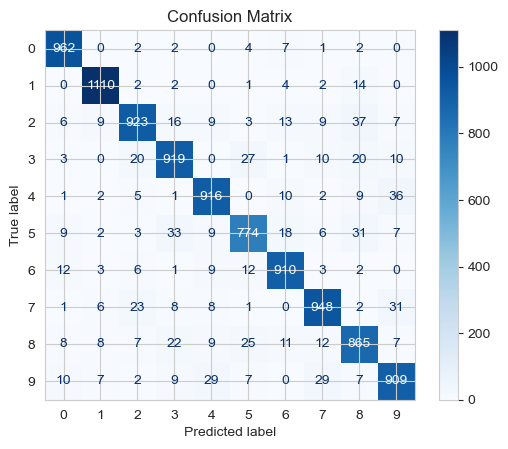

In [11]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    ConfusionMatrixDisplay

y_pred_test = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [12]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train ) , (X_test, y_test) = fashion_mnist.load_data ()
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape) 

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


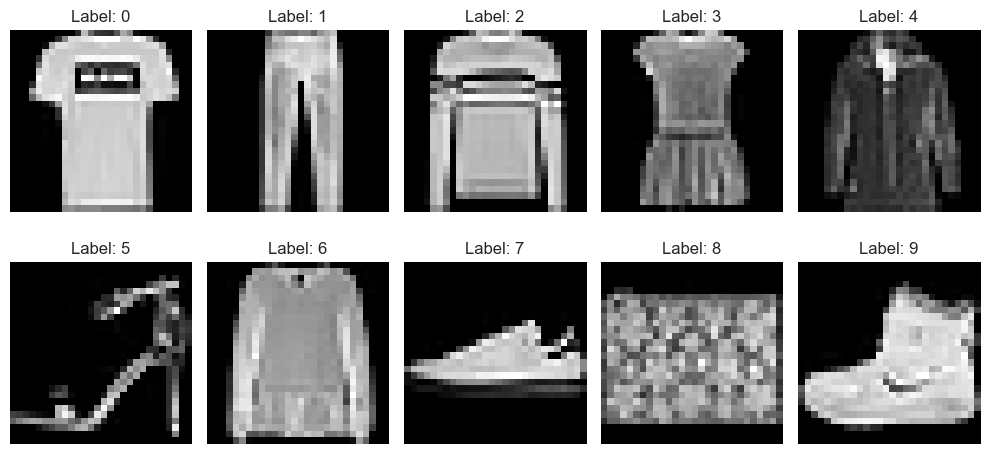

In [13]:
unique_labels = np.unique(y_train)
plt.figure(figsize=(10, 5))
for label in unique_labels: 
    index = np.where(y_train == label)[0][0]
    plt.subplot(2, 5, label + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0 
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

def one_hot_encoding(y, num_classes): 
    return np.eye(num_classes)[y]

num_classes = 10 
y_train_onehot = one_hot_encoding(y_train, num_classes)
y_test_onehot = one_hot_encoding(y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [15]:
model = SoftmaxRegression(learning_rate=0.01, epochs=1000, batch_size=500)
model.fit(X_train, y_train_onehot)

Epoch: 0, Loss: 1.2438
Epoch: 100, Loss: 0.4707
Epoch: 200, Loss: 0.4379
Epoch: 300, Loss: 0.4226
Epoch: 400, Loss: 0.4129
Epoch: 500, Loss: 0.4062
Epoch: 600, Loss: 0.4013
Epoch: 700, Loss: 0.3972
Epoch: 800, Loss: 0.3936
Epoch: 900, Loss: 0.3908


(array([[ 0.0073571 ,  0.00534923,  0.01986231, ..., -0.01735314,
          0.00656606, -0.02088489],
        [-0.00551702, -0.01326495, -0.00286418, ..., -0.00287971,
         -0.00474491, -0.00079813],
        [ 0.01933822, -0.00627202,  0.0102763 , ..., -0.00936111,
         -0.01581461,  0.00058196],
        ...,
        [-0.052998  ,  0.00890044,  0.15388251, ..., -0.01641297,
         -0.09654115, -0.00255666],
        [-0.03983076, -0.00306607,  0.05962654, ..., -0.01214091,
         -0.04743504,  0.02630921],
        [ 0.00411661,  0.01477606,  0.01621622, ...,  0.01213728,
         -0.01882348, -0.00253244]]),
 [np.float64(1.2438139117566829),
  np.float64(1.0085794773325705),
  np.float64(0.9026166979395328),
  np.float64(0.8392329787663919),
  np.float64(0.7955279447509304),
  np.float64(0.7628607529036567),
  np.float64(0.736941213298633),
  np.float64(0.7158998895358396),
  np.float64(0.6981797944755864),
  np.float64(0.6830958404428237),
  np.float64(0.669947109243509),
 

Accuracy: 0.8449
Precision (macro): 0.8439
Recall (macro): 0.8449
F1-score (macro): 0.8442


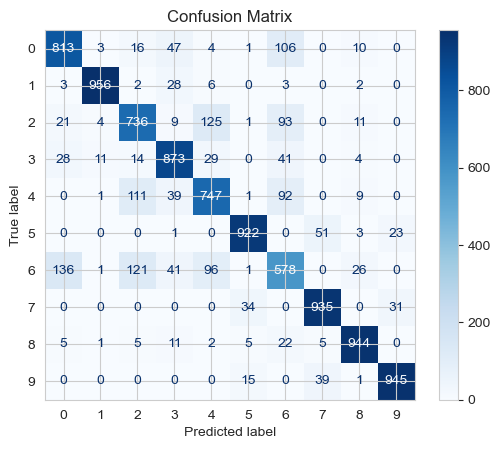

In [16]:
y_pred_test = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()